## About the dataset:

### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from autoviml.Auto_ViML import Auto_ViML

In [22]:

train_data=pd.read_csv('bank-full.csv', sep=';')
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
test_data=pd.read_csv('bank-test.csv',sep=';')


In [3]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
train_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## EDA

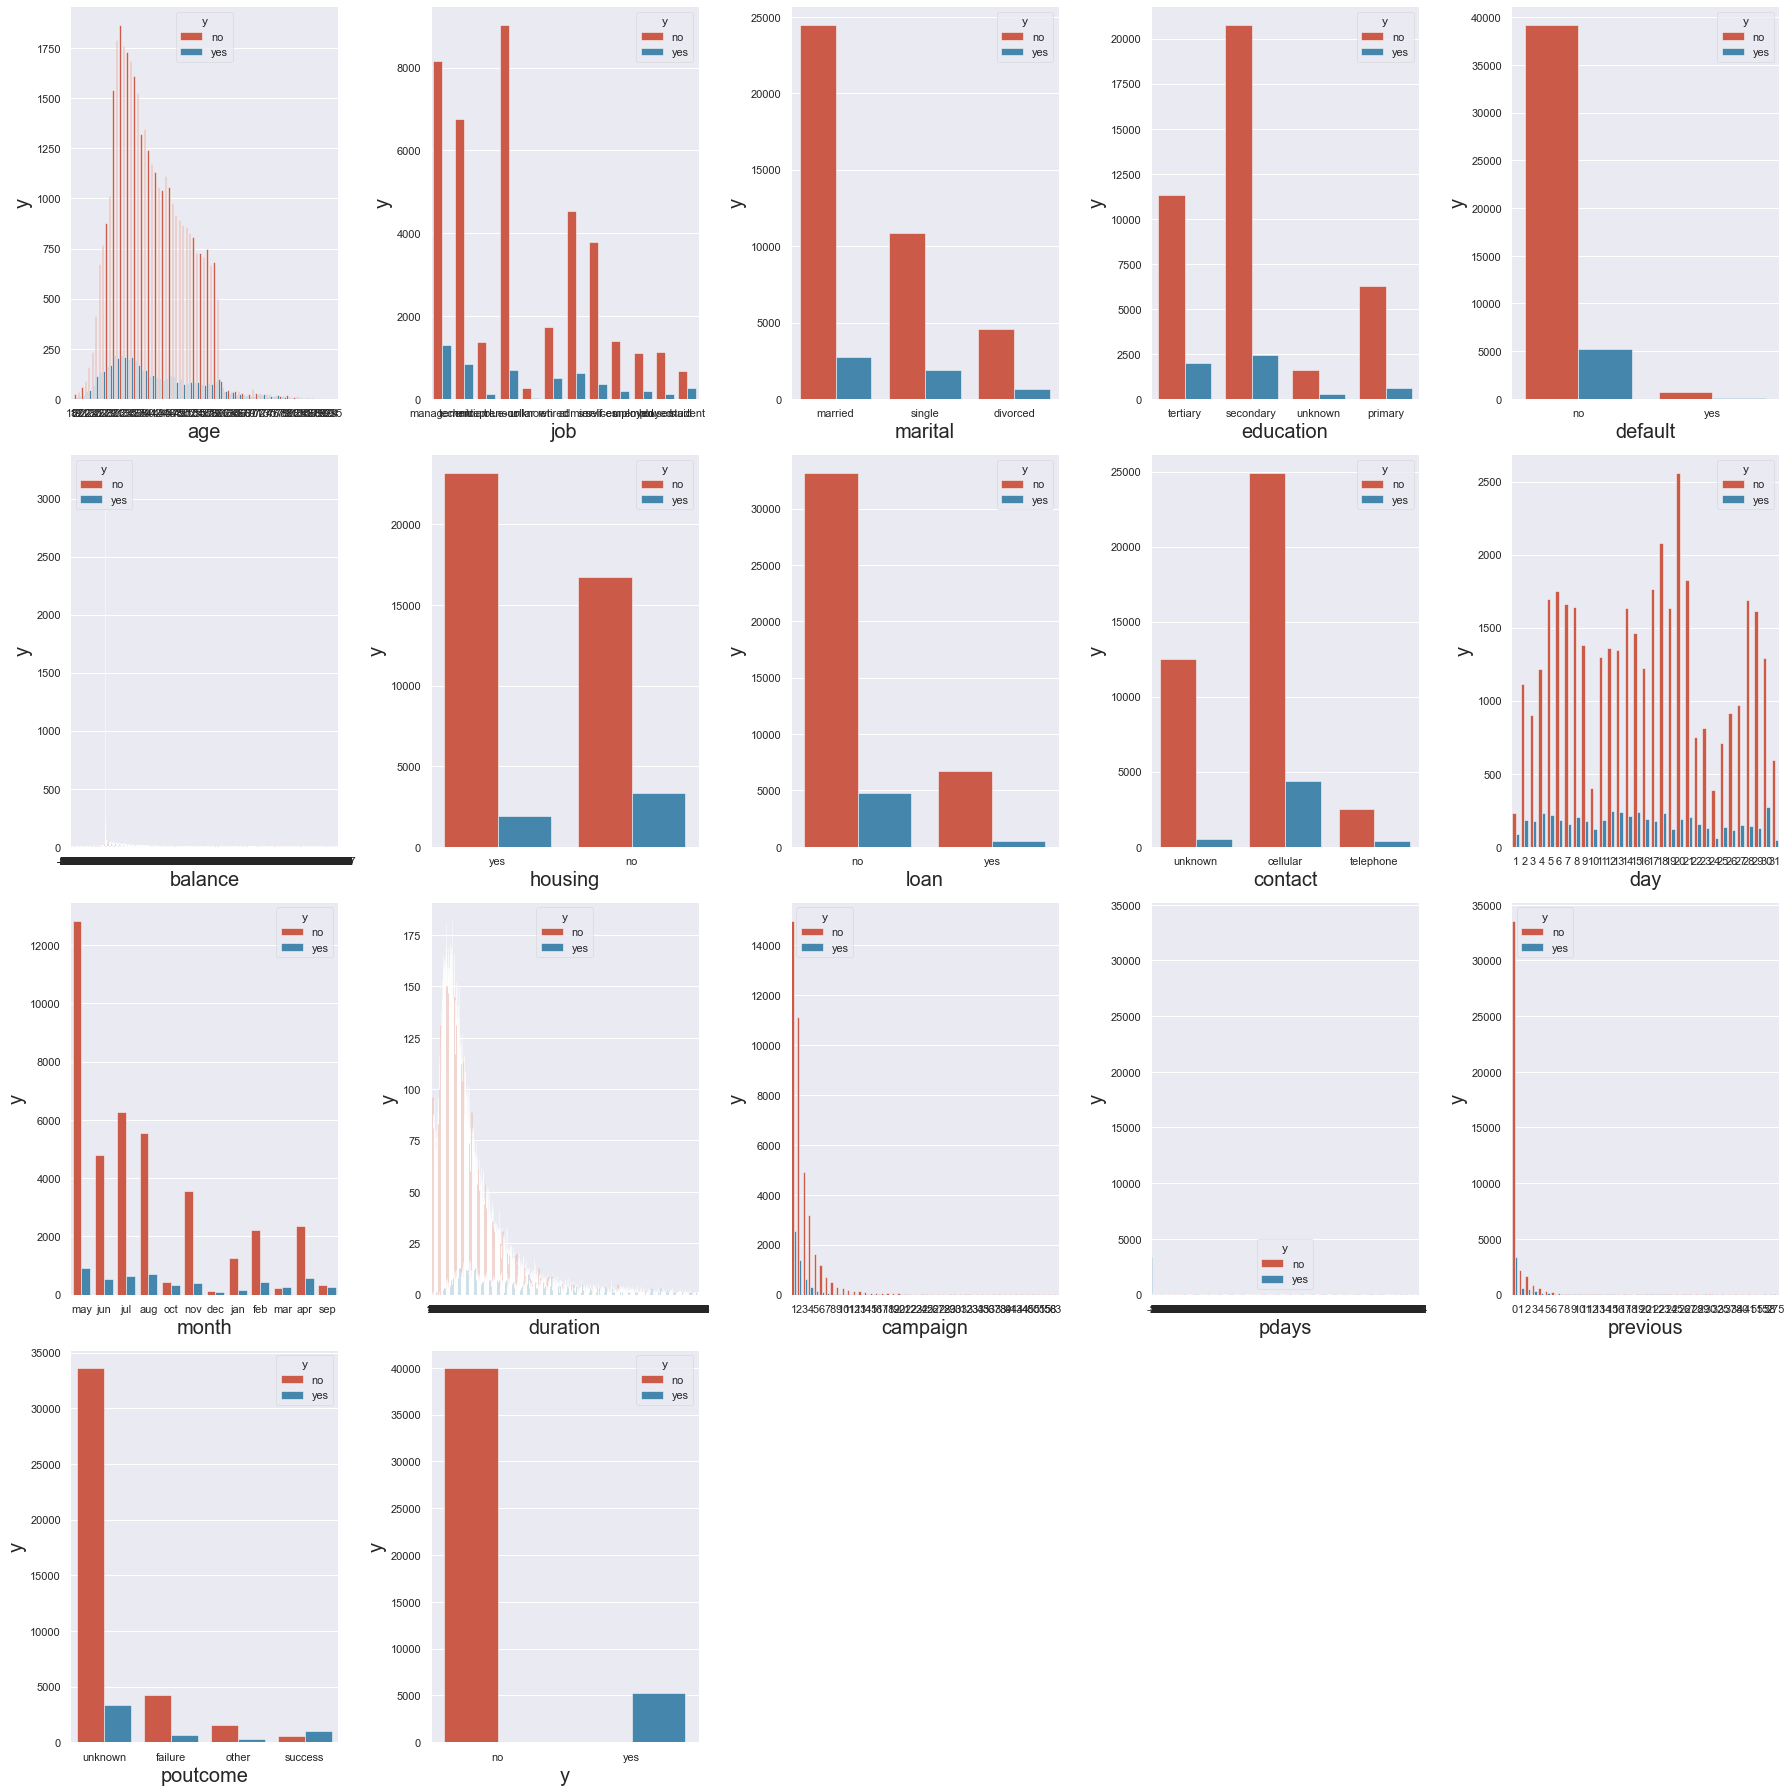

In [27]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1

for column in train_data:
    if plotnumber <=20 :
        ax = plt.subplot(4,5, plotnumber)
        sns.countplot(x=data[column].dropna(axis=0)
                     ,hue=data.y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('y', fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Model Creation and Evaluation:

In [8]:
X=data.drop(columns=['y'])
y=data['y']

In [9]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [10]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [14]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (45211, 17)
    Training Set Memory Usage = 5.86 MB
Test Set Shape = (4521, 17)
    Test Set Memory Usage = 0.59 MB
Single_Label Target: ['y']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
          no:   39922  ->   88.3%
         yes:    5289  ->   11.7%
String or Multi Class target: y transformed as follows: {'no': 0, 'yes': 1}
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##########################################################################

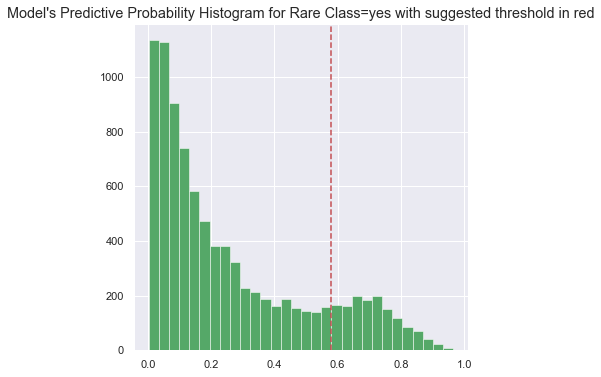

    Using threshold=0.5. However, 0.580 provides better F1=0.62 for rare class...
########################################################
SPE Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 89.7%
Balanced Accuracy = 85.15% with Threshold = 0.50
Confusion Matrix:
[[7063  922]
 [ 192  866]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7985
           1       0.48      0.82      0.61      1058

    accuracy                           0.88      9043
   macro avg       0.73      0.85      0.77      9043
weighted avg       0.92      0.88      0.89      9043

Balanced Accuracy = 82.50% with Threshold = 0.58
Confusion Matrix:
[[7342  643]
 [ 285  773]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7985
           1       0.55      0.73      0.62      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.83      

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 89.6%
    Balanced Accuracy = 70.5%
    Precision         = 56.9%
    Average Precision = 74.9%
    Recall            = 45.7%
    F1 Score          = 50.7%
#####################################################
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7985
           1       0.57      0.46      0.51      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.71      0.72      9043
weighted avg       0.89      0.90      0.89      9043

[[7619  366]
 [ 575  483]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 408
    Binning_Flag set to False or there ar

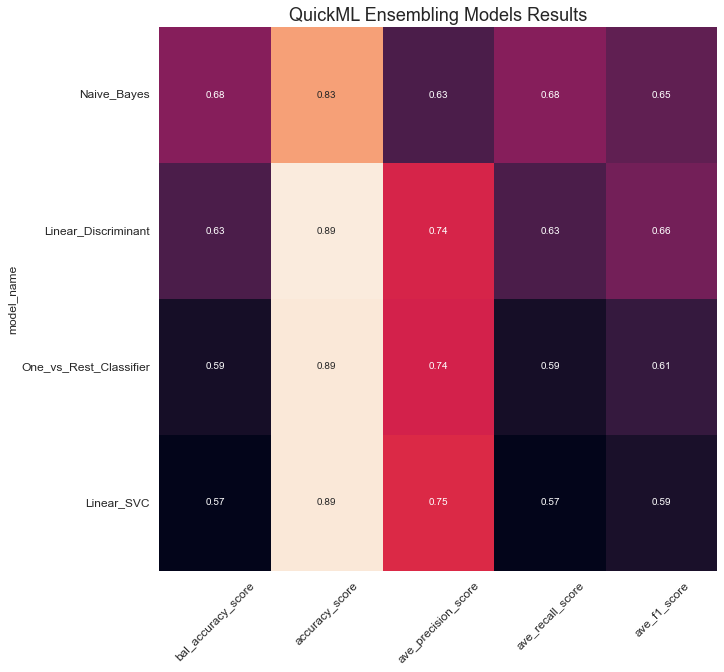

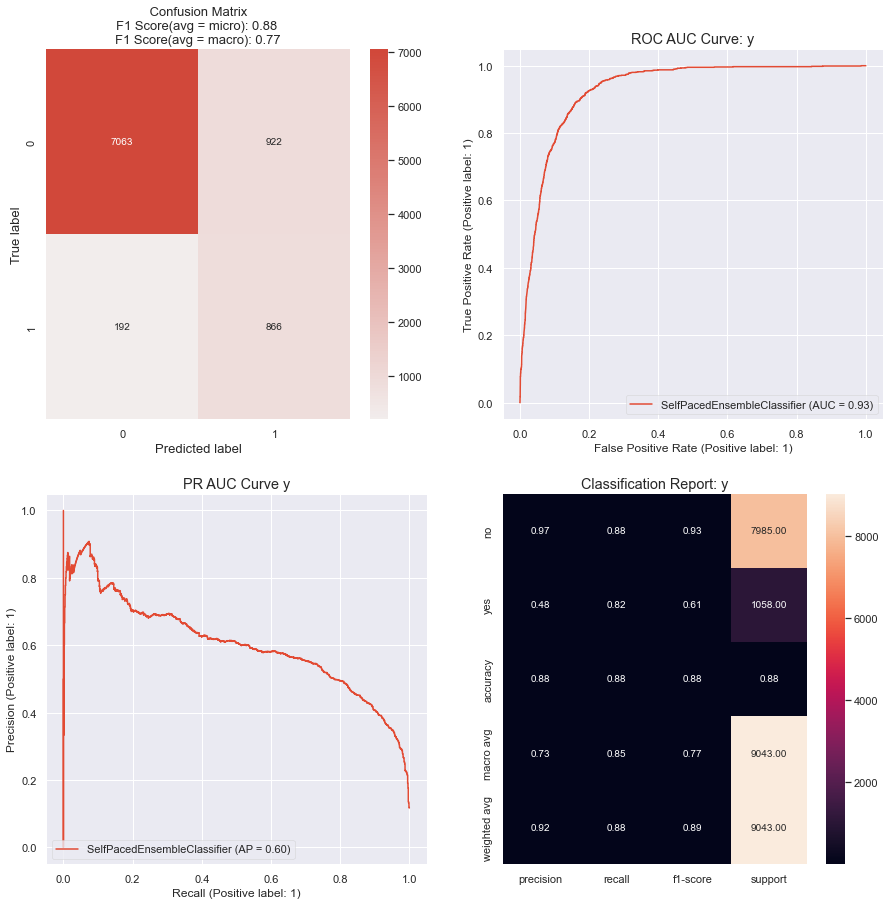

In [18]:


model, feats, trainm, testm = Auto_ViML(data,'y', test,
                            scoring_parameter='balanced_accuracy', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=False,
                             Boosting_Flag=False, Binning_Flag=True,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=True,
                            verbose=1)




### After multiple models, Ensemble Model Results:
### Binary Class Model Metrics Report
###########################################
    
    Accuracy          = 89.6%
    Balanced Accuracy = 70.5%
    Precision         = 56.9%
    Average Precision = 74.9%
    Recall            = 45.7%
    F1 Score          = 50.7%
###########################################